In [62]:
! pwd

/Users/intaewoo/Desktop/태우의 잡것들


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline

In [64]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [65]:
data =pd.read_csv('서울시코로나확진자.csv')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47961 entries, 0 to 47960
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      47961 non-null  int64  
 1   확진일     47961 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      47961 non-null  object 
 6   여행력     1203 non-null   object 
 7   접촉력     47961 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      47961 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     47961 non-null  object 
 12  수정일     47961 non-null  object 
 13  노출여부    47961 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.1+ MB


In [67]:
data.describe()

,연번,환자번호,국적,환자정보,조치사항,이동경로
count,47961.000000,0.0,0.0,0.0,0.0,0.0
mean,23981.000000,NaN,NaN,NaN,NaN,NaN
std,13845.292467,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,11991.000000,NaN,NaN,NaN,NaN,NaN
50%,23981.000000,NaN,NaN,NaN,NaN,NaN
75%,35971.000000,NaN,NaN,NaN,NaN,NaN
max,47961.000000,NaN,NaN,NaN,NaN,NaN


In [68]:
table = data.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','노출여부','등록일','수정일','여행력','상태'])

In [69]:
table

,연번,확진일,지역,접촉력
0,47961,2021.6.20,용산구,감염경로 조사중
1,47960,2021.6.20,타시도,병원 및 요양시설
2,47959,2021.6.21,타시도,타시도 확진자 접촉
3,47958,2021.6.21,마포구,타시도 확진자 접촉
4,47957,2021.6.21,관악구,감염경로 조사중
...,...,...,...,...
47956,5,2020.1.31,성북구,기타 확진자 접촉
47957,4,2020.1.30,마포구,해외유입
47958,3,2020.1.30,종로구,종로구 집단발병
47959,2,2020.1.30,중랑구,해외유입


In [70]:
table["확진일"] = pd.to_datetime(table["확진일"])

In [71]:
table['발생년']=table['확진일'].dt.year
table['발생월']=table['확진일'].dt.month
table['발생주']=table['확진일'].dt.week

/opt/anaconda3/envs/multi/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
table

,연번,확진일,지역,접촉력,발생년,발생월,발생주
0,47961,2021-06-20,용산구,감염경로 조사중,2021,6,24
1,47960,2021-06-20,타시도,병원 및 요양시설,2021,6,24
2,47959,2021-06-21,타시도,타시도 확진자 접촉,2021,6,25
3,47958,2021-06-21,마포구,타시도 확진자 접촉,2021,6,25
4,47957,2021-06-21,관악구,감염경로 조사중,2021,6,25
...,...,...,...,...,...,...,...
47956,5,2020-01-31,성북구,기타 확진자 접촉,2020,1,5
47957,4,2020-01-30,마포구,해외유입,2020,1,5
47958,3,2020-01-30,종로구,종로구 집단발병,2020,1,5
47959,2,2020-01-30,중랑구,해외유입,2020,1,5


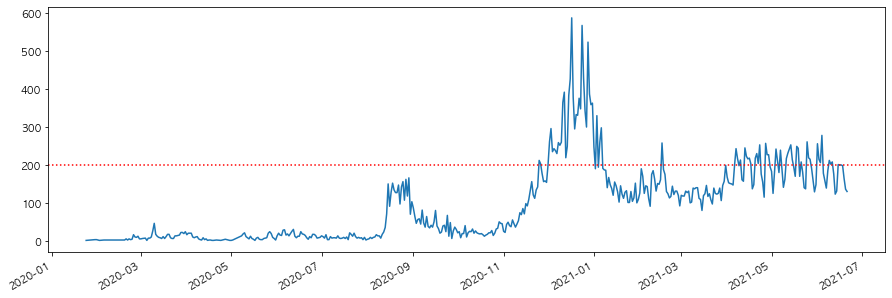

In [73]:
table["확진일"].value_counts().sort_index().plot(figsize=(15,5))
plt.axhline(200, color='red', linestyle=":")
plt.show()

In [74]:
#확진자가 가장 많은 날
day_count = table["확진일"].value_counts().sort_index()
day_count[day_count == day_count.max()]

2020-12-17    588
Name: 확진일, dtype: int64

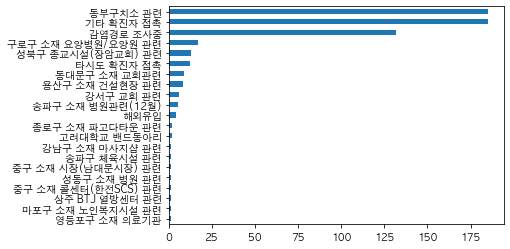

In [75]:
table[table["확진일"]=='2020-12-17']["접촉력"].value_counts().sort_values().plot.barh()
plt.show()

<AxesSubplot:xlabel='발생월'>

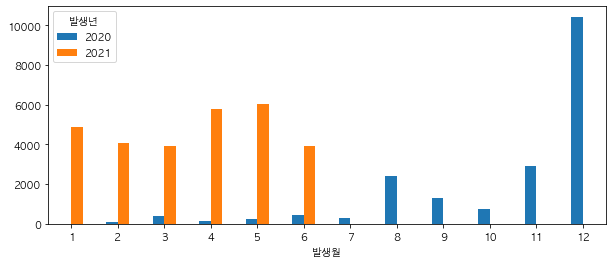

In [76]:
table.groupby(["발생월", "발생년"])["연번"].count().unstack().plot.bar(figsize=(10,4),rot=0)

In [77]:
#각 날짜별 확진자수를 저장한 데이터프레임 생성
daily_case = table["확진일"].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2020-12-17,588
2020-12-24,568
2020-12-28,524
2020-12-25,430
2020-12-16,427
...,...
2020-03-05,1
2020-04-30,1
2020-04-15,1
2020-05-01,1


In [78]:
#거주지별 확진자 분석

In [79]:
gu = table['지역'].unique()
gu

array(['용산구', '타시도', '마포구', '관악구', '기타', '강동구', '양천구', '강북구', '강서구',
       '광진구', '강남구', '중랑구', '서초구', '동작구', '금천구', '노원구', '구로구', '영등포구',
       '송파구', '동대문구', '성북구', '서대문구', '은평구', '성동구', '도봉구', '중구', '종로구'],
      dtype=object)

In [80]:
# 공백 제거
table['지역'] = table['지역'].str.strip()
table['지역'].unique()


array(['용산구', '타시도', '마포구', '관악구', '기타', '강동구', '양천구', '강북구', '강서구',
       '광진구', '강남구', '중랑구', '서초구', '동작구', '금천구', '노원구', '구로구', '영등포구',
       '송파구', '동대문구', '성북구', '서대문구', '은평구', '성동구', '도봉구', '중구', '종로구'],
      dtype=object)

In [81]:
gu_count = table['지역'].value_counts()
gu_count

강남구     2941
송파구     2905
강서구     2289
타시도     2242
관악구     2205
노원구     2194
기타      2114
중랑구     2111
서초구     2090
은평구     2043
동작구     1991
성북구     1977
강동구     1917
영등포구    1794
동대문구    1773
양천구     1663
광진구     1590
구로구     1585
마포구     1537
도봉구     1464
강북구     1381
용산구     1326
성동구     1325
서대문구    1193
금천구      800
종로구      795
중구       716
Name: 지역, dtype: int64

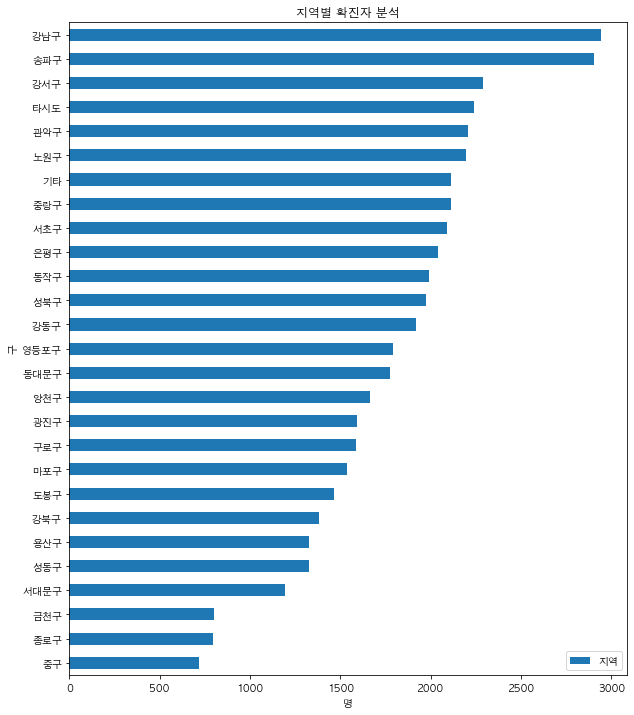

In [82]:
gu_count.sort_values().plot.barh(figsize=(10,12))
plt.legend()
plt.xlabel('명')
plt.ylabel('구')
plt.title('지역별 확진자 분석')
plt.show()

In [83]:
contact_top = table['접촉력'].value_counts().sort_values().tail(30)

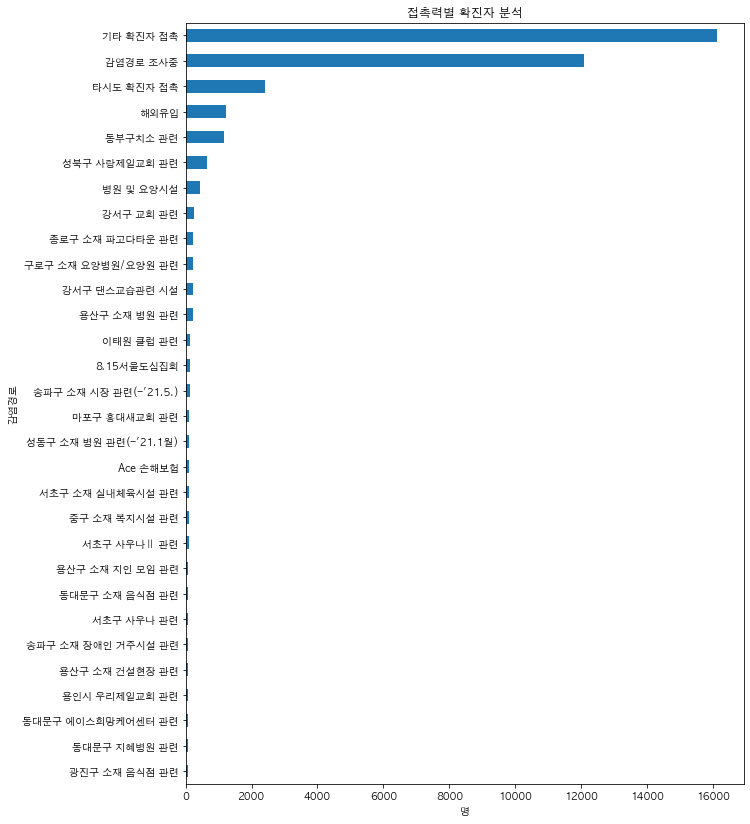

In [84]:
contact_top.plot.barh(figsize=(10,14))
plt.xlabel('명')
plt.ylabel('감염경로')
plt.title('접촉력별 확진자 분석')
plt.show()

In [85]:
#월 접촉력 별 확진자 분석

In [86]:
top_group = table[table["접촉력"].isin(contact_top.tail(15).index)]
top_group

,연번,확진일,지역,접촉력,발생년,발생월,발생주
0,47961,2021-06-20,용산구,감염경로 조사중,2021,6,24
1,47960,2021-06-20,타시도,병원 및 요양시설,2021,6,24
2,47959,2021-06-21,타시도,타시도 확진자 접촉,2021,6,25
3,47958,2021-06-21,마포구,타시도 확진자 접촉,2021,6,25
4,47957,2021-06-21,관악구,감염경로 조사중,2021,6,25
...,...,...,...,...,...,...,...
47953,8,2020-02-02,타시도,해외유입,2020,2,5
47956,5,2020-01-31,성북구,기타 확진자 접촉,2020,1,5
47957,4,2020-01-30,마포구,해외유입,2020,1,5
47959,2,2020-01-30,중랑구,해외유입,2020,1,5


In [87]:
# 2020년
top_group_2020 = top_group[top_group["발생년"]==2020].groupby(["접촉력", "발생월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020

발생월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,0,3,41,16,5,66,49,440,286,120,474,2729
강서구 교회 관련,0,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,0,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1,21,21,9,0,14,33,439,304,116,631,4023
동부구치소 관련,0,0,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0


In [88]:
top_group_2020.style.background_gradient(cmap='Reds')

발생월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,0,3,41,16,5,66,49,440,286,120,474,2729
강서구 교회 관련,0,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,0,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1,21,21,9,0,14,33,439,304,116,631,4023
동부구치소 관련,0,0,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0


In [89]:
top_group_2021 = top_group[top_group['발생년']==2021].groupby(['접촉력','발생월'])['연번'].count().unstack().fillna(0).astype(int)

In [90]:
top_group_2021.style.background_gradient(cmap='Greens')

발생월,1,2,3,4,5,6
접촉력,,,,,,
감염경로 조사중,1348,964,1011,1515,1674,1355
강서구 교회 관련,1,0,0,0,0,0
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0
기타 확진자 접촉,1961,1497,1326,2049,2245,1441
동부구치소 관련,242,0,0,0,0,0
병원 및 요양시설,57,82,63,69,113,55
송파구 소재 시장 관련(–'21.5.),0,0,0,0,66,59
용산구 소재 병원 관련,0,203,16,0,0,0
타시도 확진자 접촉,212,146,243,355,354,243


In [91]:
#감염경로 조사 중'인 확진자 분석

table_unknown = table[table['접촉력']=='감염경로 조사중']

In [92]:
table_unknown

,연번,확진일,지역,접촉력,발생년,발생월,발생주
0,47961,2021-06-20,용산구,감염경로 조사중,2021,6,24
4,47957,2021-06-21,관악구,감염경로 조사중,2021,6,25
6,47955,2021-06-21,강동구,감염경로 조사중,2021,6,25
7,47954,2021-06-21,양천구,감염경로 조사중,2021,6,25
11,47950,2021-06-21,강서구,감염경로 조사중,2021,6,25
...,...,...,...,...,...,...,...
47865,96,2020-03-02,서초구,감염경로 조사중,2020,3,10
47871,90,2020-03-01,강남구,감염경로 조사중,2020,3,9
47878,83,2020-02-29,영등포구,감염경로 조사중,2020,2,9
47880,81,2020-02-28,성동구,감염경로 조사중,2020,2,9


In [93]:
unknown_weekly_case = table_unknown.groupby(['발생년','발생월'])['연번'].count()

In [94]:
unknown_weekly_case

발생년   발생월
2020  2         3
      3        41
      4        16
      5         5
      6        66
      7        49
      8       440
      9       286
      10      120
      11      474
      12     2729
2021  1      1348
      2       964
      3      1011
      4      1515
      5      1674
      6      1355
Name: 연번, dtype: int64

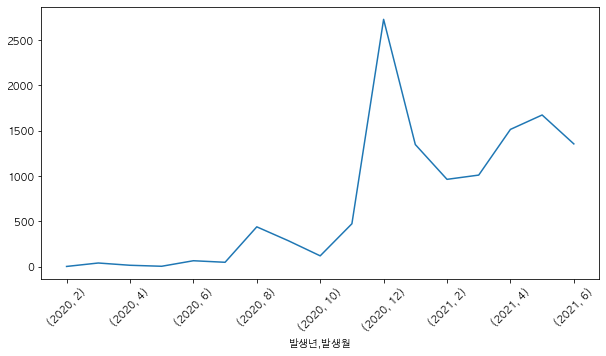

In [95]:
unknown_weekly_case.plot(figsize=(10,5),rot=45)
plt.show()

In [96]:
# 1) 전체 확진수 데이터프레임
all_weekly_case = table[["발생년", "발생주"]].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]

# 2) 감염경로가 불명확한 확진수 데이터프레임
unknown_weekly_case = table_unknown[["발생년", "발생주"]].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]

In [97]:
all_weekly_case

전체확진수
발생년  발생주       
2020 52    2696
     51    2653
     50    1977
     53    1633
     49    1627
...         ...
     5        7
     6        4
     17       3
     7        2
     4        1

[76 rows x 1 columns]

In [98]:
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case

전체확진수  불명확진수
발생년  발생주              
2020 9       61      4
     10      38      3
     11     124      8
     12      76     18
     13     105      8
...         ...    ...
2021 22    1440    419
     23    1245    473
     24    1230    450
     25     130     49
     53     768    231

[67 rows x 2 columns]

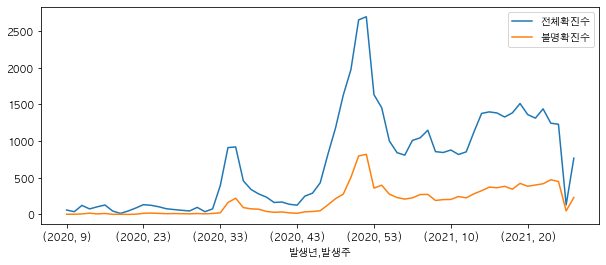

In [99]:
unknown_case.plot(figsize=(10,4))
plt.show()

In [100]:
unknown_case['확인중비율']=unknown_case['불명확진수']/unknown_case['전체확진수']*100

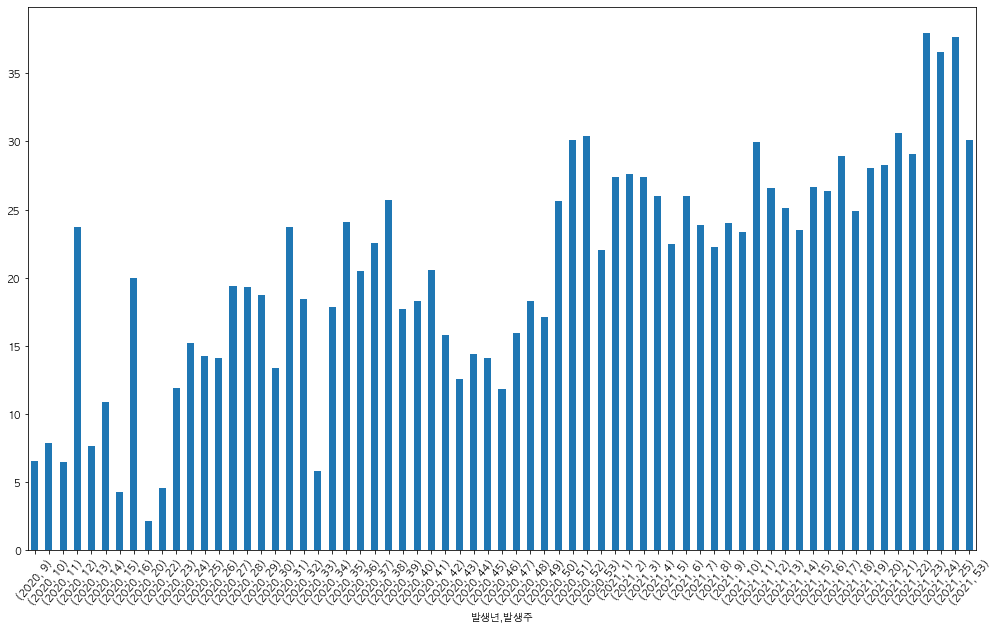

In [101]:
unknown_case['확인중비율'].plot.bar(figsize = (17,10),rot=50)
plt.show()

In [102]:
#퇴원, 사망 여부 분석
data["퇴원"] = data["상태"].str.contains("퇴원", na=False)
data["사망"] = data["상태"].str.contains("사망", na=False)
data

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망
0,47961,2021.6.20,NaN,NaN,NaN,용산구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
1,47960,2021.6.20,NaN,NaN,NaN,타시도,NaN,병원 및 요양시설,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
2,47959,2021.6.21,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
3,47958,2021.6.21,NaN,NaN,NaN,마포구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
4,47957,2021.6.21,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47956,5,2020.1.31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47957,4,2020.1.30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47958,3,2020.1.30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47959,2,2020.1.30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False


In [103]:
data['퇴원'].value_counts(normalize=True) # nomalize = 비율

True     0.940973
False    0.059027
Name: 퇴원, dtype: float64

In [104]:
data['사망'].value_counts()

False    47452
True       509
Name: 사망, dtype: int64

In [105]:
gu_count

강남구     2941
송파구     2905
강서구     2289
타시도     2242
관악구     2205
노원구     2194
기타      2114
중랑구     2111
서초구     2090
은평구     2043
동작구     1991
성북구     1977
강동구     1917
영등포구    1794
동대문구    1773
양천구     1663
광진구     1590
구로구     1585
마포구     1537
도봉구     1464
강북구     1381
용산구     1326
성동구     1325
서대문구    1193
금천구      800
종로구      795
중구       716
Name: 지역, dtype: int64

In [106]:
# 가장 오래 입원중인 환자
data_seoul = data[data["지역"].isin(gu_count.index)]
data_seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망
0,47961,2021.6.20,NaN,NaN,NaN,용산구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
1,47960,2021.6.20,NaN,NaN,NaN,타시도,NaN,병원 및 요양시설,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
2,47959,2021.6.21,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
3,47958,2021.6.21,NaN,NaN,NaN,마포구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
4,47957,2021.6.21,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47956,5,2020.1.31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47957,4,2020.1.30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47958,3,2020.1.30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47959,2,2020.1.30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False


In [107]:
data_seoul[(data_seoul["퇴원"]==False) & (data_seoul["사망"]==False)].tail()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망
8592,39369,2021.5.7,NaN,NaN,NaN,동작구,NaN,양천구 소재 직장 관련(–'21.5.),NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
8783,39178,2021.5.7,NaN,NaN,NaN,서초구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
10231,37730,2021.4.29,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
11970,35991,2021.4.20,NaN,NaN,NaN,양천구,NaN,기타 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
15646,32315,2021.4.1,NaN,NaN,NaN,강남구,NaN,강남구 소재 주점 관련,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False


In [108]:
#여행력 별 확진자 분석

In [109]:
data

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망
0,47961,2021.6.20,NaN,NaN,NaN,용산구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
1,47960,2021.6.20,NaN,NaN,NaN,타시도,NaN,병원 및 요양시설,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
2,47959,2021.6.21,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
3,47958,2021.6.21,NaN,NaN,NaN,마포구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
4,47957,2021.6.21,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47956,5,2020.1.31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47957,4,2020.1.30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47958,3,2020.1.30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False
47959,2,2020.1.30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False


In [110]:
# 전처리를 수행할 때, 새로운 칼럼을 생성한 후에 전처리 하는 것이 좋음
data["해외"] = data["여행력"] 

# df_oversea: 해외 칼럼 데이터를 가진 경우만 필터링
data_oversea = data[data["해외"].notnull()].copy()	
data_oversea.drop(data_oversea[data_oversea["해외"]=='28238'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제
data_oversea.drop(data_oversea[data_oversea["해외"]=='21263'].index, inplace=True) # 환자 번호가 잘못 들어간 row 데이터 삭제

In [111]:
data_oversea

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망,해외
22,47939,2021.6.21,NaN,NaN,NaN,서초구,인도네시아,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,인도네시아
32,47929,2021.6.21,NaN,NaN,NaN,강남구,덴마크,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,덴마크
65,47896,2021.6.21,NaN,NaN,NaN,용산구,프랑스,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,프랑스
90,47871,2021.6.21,NaN,NaN,NaN,강남구,인도네시아,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,인도네시아
110,47851,2021.6.21,NaN,NaN,NaN,강남구,필리핀,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,필리핀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,9,2020.2.5,NaN,NaN,NaN,송파구,아시아,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,아시아
47953,8,2020.2.2,NaN,NaN,NaN,타시도,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국
47957,4,2020.1.30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국
47959,2,2020.1.30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국


In [112]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")

In [113]:
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드'

In [114]:
data_oversea.loc[data_oversea["해외"].str.contains(europe), "해외"] = '유럽'
data_oversea.loc[data_oversea["해외"].str.contains(south_america), "해외"] = '남미'
data_oversea.loc[data_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
data_oversea.loc[data_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
data_oversea.loc[data_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
data_oversea.loc[data_oversea["해외"].str.contains('미국'), "해외"] = '미국'

In [115]:
data_oversea

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,퇴원,사망,해외
22,47939,2021.6.21,NaN,NaN,NaN,서초구,인도네시아,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,인도네시아
32,47929,2021.6.21,NaN,NaN,NaN,강남구,덴마크,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,덴마크
65,47896,2021.6.21,NaN,NaN,NaN,용산구,프랑스,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,유럽
90,47871,2021.6.21,NaN,NaN,NaN,강남구,인도네시아,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,인도네시아
110,47851,2021.6.21,NaN,NaN,NaN,강남구,필리핀,해외유입,NaN,-,NaN,2021.6.22 9:56,2021.6.22 9:56,Y,False,False,필리핀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,9,2020.2.5,NaN,NaN,NaN,송파구,아시아,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,아시아
47953,8,2020.2.2,NaN,NaN,NaN,타시도,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국
47957,4,2020.1.30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국
47959,2,2020.1.30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021.5.27 11:08,2021.5.27 11:08,Y,True,False,중국


In [116]:
day_oversea = data_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea.to_frame()

연번
확진일        해외        
2020.1.24  중국       1
2020.1.30  중국       2
2020.10.1  아시아      2
2020.10.10 남미       1
           요르단      1
...                ..
2021.6.6   인도       1
2021.6.8   스리랑카     1
           우즈베키스탄   1
           유럽       1
           인도네시아    1

[848 rows x 1 columns]

In [117]:
day_oversea_cumsum = day_oversea.groupby(level=[1]).cumsum()
day_oversea_cumsum

확진일         해외    
2020.1.24   중국          1
2020.1.30   중국          3
2020.10.1   아시아         2
2020.10.10  남미          1
            요르단         1
                     ... 
2021.6.6    인도         21
2021.6.8    스리랑카        5
            우즈베키스탄     10
            유럽        244
            인도네시아      31
Name: 연번, Length: 848, dtype: int64

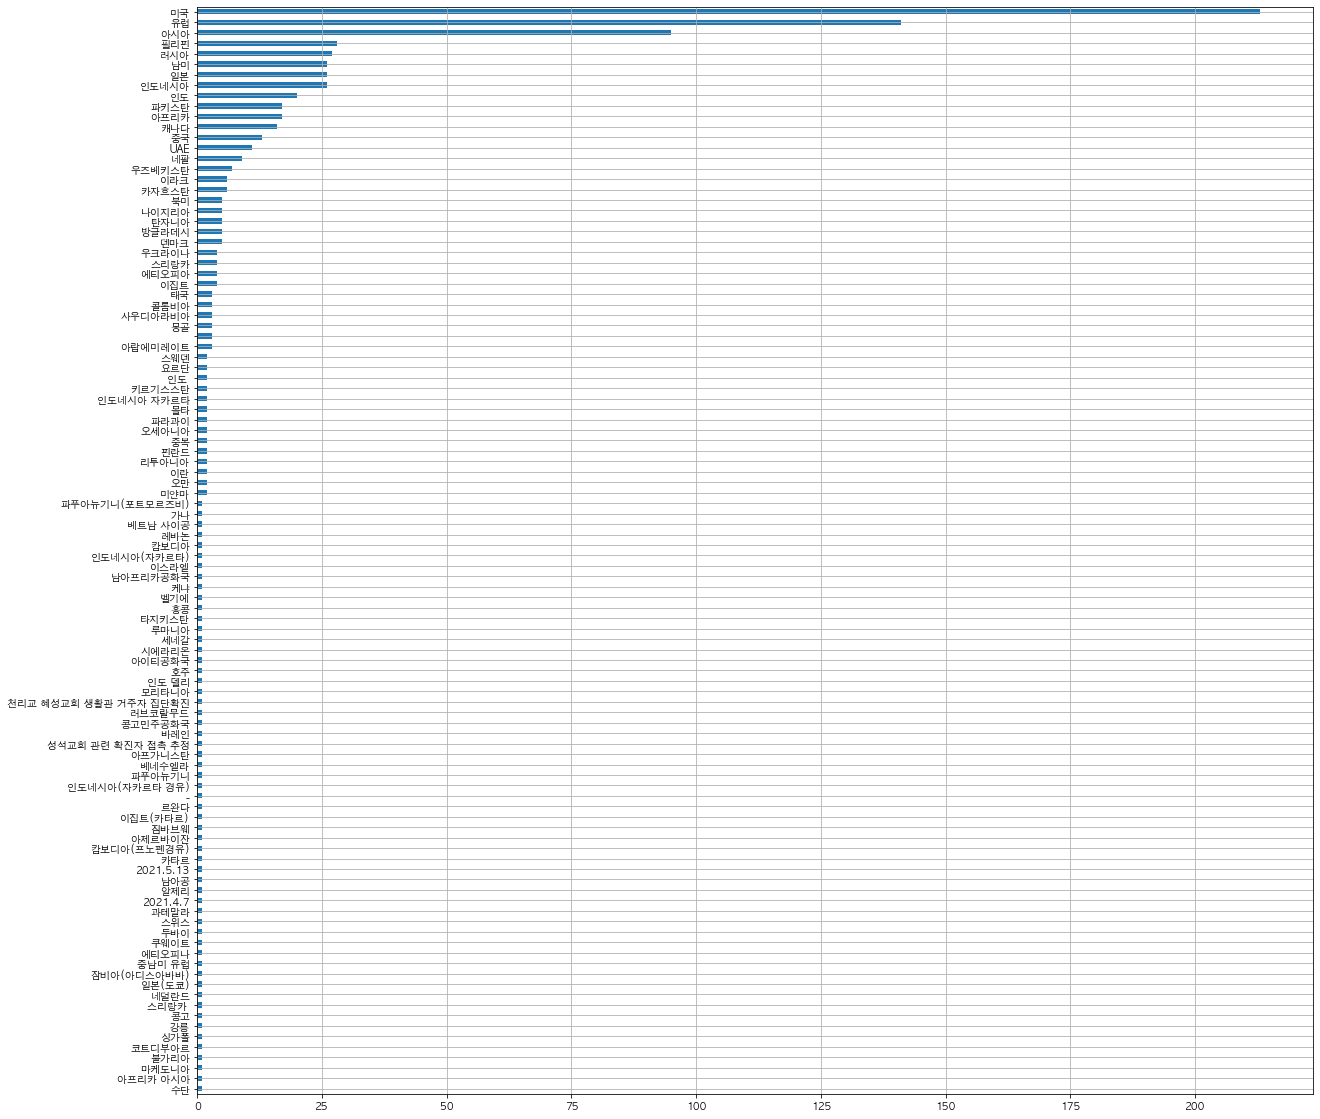

In [118]:
day_oversea_cumsum = day_oversea_cumsum.reset_index()
day_oversea_cumsum = day_oversea_cumsum.rename(columns={"연번": "누적확진수"})

oversea_count = day_oversea_cumsum["해외"].value_counts()
oversea_count.sort_values().plot.barh(figsize=(20,20))
plt.grid(True)

<AxesSubplot:>

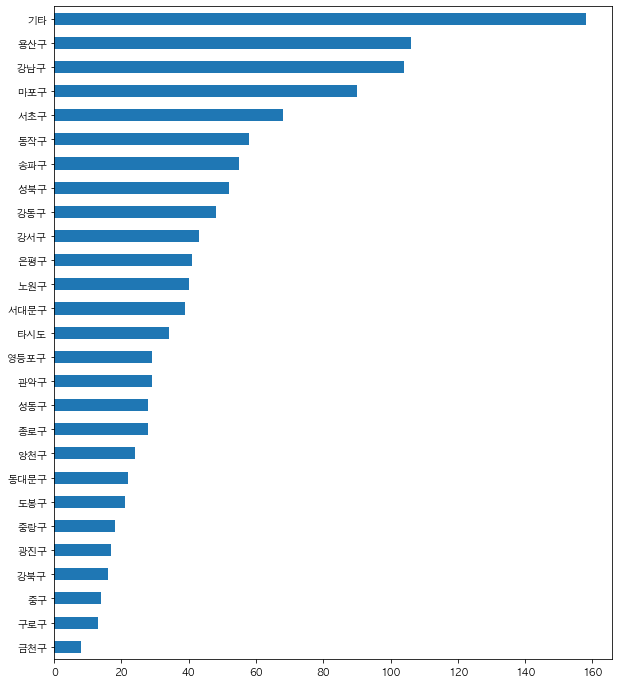

In [120]:
#거주지와 여행력 국가별 확진자 분석 
#여행력을 가진 확진자는 기타지역에 가장 많이 거주하고 있으며, 용산구, 강남구 순으로 많이 거주하고 있습니다. 
oversea_count_gu = data_oversea["지역"].value_counts()
oversea_count_gu.sort_values().plot.barh(figsize=(10,12))


In [121]:
#거주지 별 전체 확진자 수 및 여행력을 가진 확진자 수 분석 
# 거주지 별 전체 확진자
all_count_gu = data["지역"].value_counts()
data_all_gu = all_count_gu.to_frame()
data_all_gu.columns = ["전체확진수"]


# 거주지 별 여행력을 가진 확진자 
oversea_count_gu = data_oversea["지역"].value_counts()
data_oversea_gu = oversea_count_gu.to_frame()
data_oversea_gu.columns = ["여행력존재확진수"]

In [124]:
data_all_oversea_case = data_all_gu.merge(data_oversea_gu, left_index=True, right_index=True)
data_all_oversea_case

,전체확진수,여행력존재확진수
강남구,2941,104
송파구,2905,55
강서구,2289,43
타시도,2242,34
관악구,2205,29
노원구,2194,40
기타,2114,158
중랑구,2111,18
서초구,2090,68
은평구,2043,41


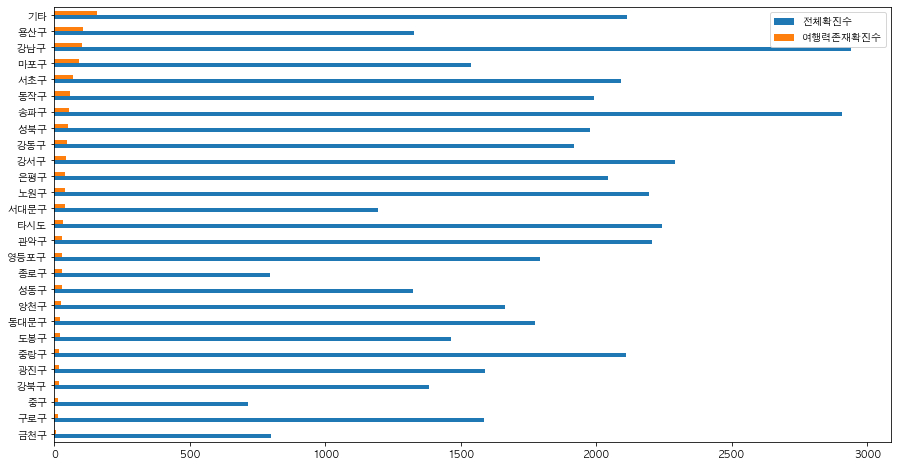

In [128]:
data_all_oversea_case.sort_values(by="여행력존재확진수").plot.barh(figsize=(15,8))
plt.show()